# 데이터 분석 코드 필사 (2020.07.29)
### 원본: [EDA, Feature Engineering and model interpretation (by Andrew Lukyanenko)](https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation)
### 데이터 소스: [TMDB(The Movie DB)](https://www.themoviedb.org/)
### 순서
### [1. 문제 정의](#문제-정의)
### [2. 데이터 정의](#데이터-정의)
### [3. 데이터 전처리](#데이터-전처리)
> ### [3.1. belongs_to_collection](#(1)-belongs_to_collection)
> ### [3.2. genres](#(2)-genres)
> ### [3.3. production_companies](#(3)-production_companies)
> ### [3.4. production_countries](#(4)-production_countries)
> ### [3.5. spoken_languages](#(5)-spoken_languages)
> ### [3.6. Keywords](#(6)-Keywords)
> ### [3.7. cast](#(7)-cast)
### [4. 데이터 분석](#데이터-분석)
### [5. 모델링](#모델링)
***

# 문제 정의
* 영화 산업이 폭발적으로 성장하며, 영화 상영으로 인한 수익 또한 증가
* 현재까지 개봉한 수많은 영화들로부터 데이터를 수집해옴 (**TMDB**)


* 문제: 영화 정보들을 사용해 영화 **수익 예측**, 정말 영화 정보만을 사용해 정확한 수익 예측이 가능할 것인가?
* 훈련 데이터: 영화 정보와 수익 정보
* 테스트 데이터: 오직 영화 정보만
***

# 데이터 정의

### 데이터 불러오기

In [1]:
import pandas as pd

train_df = pd.read_csv("./DATA/train.csv")
test_df  = pd.read_csv("./DATA/test.csv")

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [2]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

* 결측 수

|변수 명              |훈련 데이터 결측|테스트 데이터 결측|
|:---                 |:---            |:---              |
|belongs_to_collection|2396            |0                 |
|genres               |7               |0                 |
|homepage             |2054            |2978              |
|overview             |8               |14                |
|poster_path          |1               |1                 |
|production_companies |156             |0                 |
|production_countries |55              |0                 |
|release_date         |0               |1                 |
|runtime              |2               |4                 |
|spoken_languages     |20              |0                 |
|status               |0               |2                 |
|tagline              |597             |863               |
|title                |0               |3                 |
|Keywords             |276             |0                 |
|cast                 |13              |0                 |
|crew                 |16              |0                 |

### 데이터 확인

In [3]:
train_df.shape, test_df.shape

((3000, 23), (4398, 22))

* 훈련 데이터가 **3000** 샘플, 테스트 데이터가 **4398** 샘플
* 테스트 데이터가 더 많음!

***
# 데이터 전처리

### (1) belongs_to_collection

In [4]:
train_df["belongs_to_collection"].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                  NaN
3                                                  NaN
4                                                  NaN
Name: belongs_to_collection, dtype: object

* belongs_to_collection 변수의 경우 리스트에 딕셔너리가 들어있는 자료 형
* 그런데 결측의 경우 딕셔너리가 아닌 **NaN**으로 채워져 있음
* 딕셔너리 형 변수의 NaN을 **{}**로 바꿔줘야 편함

##### 딕셔너리 형 변수의 NaN을 { }로 변환

In [5]:
train_df["belongs_to_collection"].apply(lambda x: {} if pd.isna(x) else x)[0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

* 위 코드처럼 짜면 리스트([ ])가 아닌 문자열(" ") 형태로 저장

In [6]:
import ast

dict_columns = ["belongs_to_collection", "genres", "production_companies", "production_countries", "spoken_languages", "Keywords",\
                "cast", "crew"]

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))    
    return df

train_df = text_to_dict(train_df)
test_df  = text_to_dict( test_df)

train_df["belongs_to_collection"].head()

0    [{'id': 313576, 'name': 'Hot Tub Time Machine ...
1    [{'id': 107674, 'name': 'The Princess Diaries ...
2                                                   {}
3                                                   {}
4                                                   {}
Name: belongs_to_collection, dtype: object

In [7]:
train_df["belongs_to_collection"][0]

[{'id': 313576,
  'name': 'Hot Tub Time Machine Collection',
  'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg',
  'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]

* ast 패키지를 사용해서 **ast.literal_eval()** 함수를 사용하면 **리스트 형태로 저장**
* 나중에 필요한 정보를 리스트에서 추출하기 쉬워짐

##### 정보 추출해 시리즈 이름, 시리즈 여부로 저장

In [8]:
train_df["collection_name"] = train_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x != {} else 0)
train_df["has_collection"]  = train_df["belongs_to_collection"].apply(lambda x: len(x) if x != {} else 0)

test_df["collection_name"] = test_df["belongs_to_collection"].apply(lambda x: x[0]["name"] if x != {} else 0)
test_df["has_collection"]  = test_df["belongs_to_collection"].apply(lambda x: len(x) if x != {} else 0)

train_df = train_df.drop(["belongs_to_collection"], axis = 1)
test_df  =  test_df.drop(["belongs_to_collection"], axis = 1)

train_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0


### (2) genres

In [9]:
train_df["genres"].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

##### 몇 개의 장르로 분류되었는지 확인

In [10]:
train_df["genres"].apply(lambda x: len(x) if x != {} else 0)

0       1
1       4
2       1
3       2
4       2
       ..
2995    2
2996    2
2997    4
2998    2
2999    3
Name: genres, Length: 3000, dtype: int64

In [11]:
train_df["genres"].apply(lambda x: len(x) if x != {} else 0).value_counts()

2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

* 대부분의 영화가 **2~3 개의 장르**를 포함
* 0, 7 개의 장르를 포함하는 것은 드물게 나타남

##### 각 영화의 장르 이름들만 추출

In [12]:
list_of_genres = list(train_df["genres"].apply(lambda x: [i["name"] for i in x] if x != {} else []).values)

list_of_genres

[['Comedy'],
 ['Comedy', 'Drama', 'Family', 'Romance'],
 ['Drama'],
 ['Thriller', 'Drama'],
 ['Action', 'Thriller'],
 ['Animation', 'Adventure', 'Family'],
 ['Horror', 'Thriller'],
 ['Documentary'],
 ['Action', 'Comedy', 'Music', 'Family', 'Adventure'],
 ['Comedy', 'Music'],
 ['Drama'],
 ['Comedy'],
 ['Drama'],
 ['Comedy', 'Crime'],
 ['Action', 'Thriller', 'Science Fiction', 'Mystery'],
 ['Action', 'Crime', 'Drama'],
 ['Horror', 'Thriller'],
 ['Drama', 'Romance'],
 ['Comedy', 'Romance'],
 ['Action', 'Thriller', 'Crime'],
 ['Adventure', 'Family', 'Science Fiction'],
 ['Horror', 'Thriller'],
 ['Thriller', 'Horror'],
 ['Thriller', 'Mystery', 'Foreign'],
 ['Horror', 'Comedy'],
 ['Comedy', 'Horror', 'Mystery', 'Thriller'],
 ['Crime', 'Drama', 'Mystery', 'Thriller'],
 ['Drama', 'Comedy', 'Romance'],
 ['Animation'],
 ['Action', 'Adventure', 'Crime', 'Thriller'],
 ['Drama', 'Comedy'],
 ['Mystery', 'Drama', 'Thriller'],
 ['Fantasy', 'Action', 'Adventure'],
 ['Horror'],
 ['Action', 'Comedy', 'Cr

##### 장르의 단어 구름 생성

In [13]:
text = " ".join([i for j in list_of_genres for i in j]) # 리스트를 문자열로, 단 단어 사이를 " "로 나눔
text

'Comedy Comedy Drama Family Romance Drama Thriller Drama Action Thriller Animation Adventure Family Horror Thriller Documentary Action Comedy Music Family Adventure Comedy Music Drama Comedy Drama Comedy Crime Action Thriller Science Fiction Mystery Action Crime Drama Horror Thriller Drama Romance Comedy Romance Action Thriller Crime Adventure Family Science Fiction Horror Thriller Thriller Horror Thriller Mystery Foreign Horror Comedy Comedy Horror Mystery Thriller Crime Drama Mystery Thriller Drama Comedy Romance Animation Action Adventure Crime Thriller Drama Comedy Mystery Drama Thriller Fantasy Action Adventure Horror Action Comedy Crime Thriller Action Crime Thriller Comedy Romance Action Drama Science Fiction Thriller Thriller War Western Action Documentary Crime Drama Comedy Drama Comedy Romance Crime Drama Mystery Romance Thriller Animation Family Comedy Adventure Crime Drama Mystery Western Drama Comedy Science Fiction Action Adventure Thriller Romance Drama Comedy Adventure 

(-0.5, 1199.5, 999.5, -0.5)

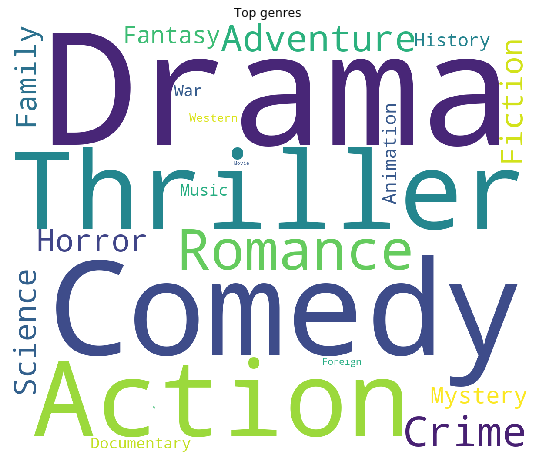

In [14]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

plt.figure(figsize = (12, 8)) # figsize = (x, y)
word_cloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                       width = 1200, height = 1000).generate(text) # collocations: 연어 처리, width / height: 그림 너비 / 높이
plt.imshow(word_cloud) # 2차원 그림 표출
plt.title("Top genres") # 그림 상단에 제목
plt.axis("off") # 그림에 x, y 축 제거

##### 장르의 빈도 계산

In [15]:
text_list = [i for j in list_of_genres for i in j]

text_list

['Comedy',
 'Comedy',
 'Drama',
 'Family',
 'Romance',
 'Drama',
 'Thriller',
 'Drama',
 'Action',
 'Thriller',
 'Animation',
 'Adventure',
 'Family',
 'Horror',
 'Thriller',
 'Documentary',
 'Action',
 'Comedy',
 'Music',
 'Family',
 'Adventure',
 'Comedy',
 'Music',
 'Drama',
 'Comedy',
 'Drama',
 'Comedy',
 'Crime',
 'Action',
 'Thriller',
 'Science Fiction',
 'Mystery',
 'Action',
 'Crime',
 'Drama',
 'Horror',
 'Thriller',
 'Drama',
 'Romance',
 'Comedy',
 'Romance',
 'Action',
 'Thriller',
 'Crime',
 'Adventure',
 'Family',
 'Science Fiction',
 'Horror',
 'Thriller',
 'Thriller',
 'Horror',
 'Thriller',
 'Mystery',
 'Foreign',
 'Horror',
 'Comedy',
 'Comedy',
 'Horror',
 'Mystery',
 'Thriller',
 'Crime',
 'Drama',
 'Mystery',
 'Thriller',
 'Drama',
 'Comedy',
 'Romance',
 'Animation',
 'Action',
 'Adventure',
 'Crime',
 'Thriller',
 'Drama',
 'Comedy',
 'Mystery',
 'Drama',
 'Thriller',
 'Fantasy',
 'Action',
 'Adventure',
 'Horror',
 'Action',
 'Comedy',
 'Crime',
 'Thriller',
 

In [16]:
from collections import Counter

genres_common = Counter(text_list).most_common(15) # 리스트에서 단어별 빈도 수 계산하고 빈도가 많은 15개를 많은 순으로 표출

genres_common

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100)]

* **드라마, 코미디, 스릴러 장르**가 흔함

##### 장르 수, 장르 명을 변수로 추가

In [17]:
train_df["num_genres"] = train_df["genres"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_genres"] = train_df["genres"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

test_df["num_genres"] = test_df["genres"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_genres"] = test_df["genres"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

train_df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection,num_genres,all_genres
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1,1,Comedy
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1,4,Comedy Drama Family Romance
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,0,0,1,Drama
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,0,0,2,Drama Thriller
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,0,0,2,Action Thriller


##### 가장 흔한 장르 15개에 속하는지 여부를 변수로 생성

In [18]:
top_genres = [m[0] for m in genres_common]

for g in top_genres:
    train_df["genre_" + g] = train_df["all_genres"].apply(lambda x: 1 if g in x else 0)
    test_df[ "genre_" + g] =  test_df["all_genres"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["genres", "all_genres"], axis = 1)
test_df  =  test_df.drop(["genres", "all_genres"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,0,0,1,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},...,0,0,0,0,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},...,0,0,0,0,0,0,0,0,0,0


### (3) production_companies

In [19]:
train_df["production_companies"].head()

0    [{'name': 'Paramount Pictures', 'id': 4}, {'na...
1          [{'name': 'Walt Disney Pictures', 'id': 2}]
2    [{'name': 'Bold Films', 'id': 2266}, {'name': ...
3                                                   {}
4                                                   {}
Name: production_companies, dtype: object

##### 제작사 수 분포

In [20]:
train_df["production_companies"].apply(lambda x: len(x) if x != {} else 0).value_counts()

1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

* **제작사가 1~2개인 경우가 대부분이고**, 제작사가 없는 경우도 있음

##### 각 영화의 제작사 이름들 추출

In [21]:
list_of_companies = list(train_df["production_companies"].apply(lambda x: [i["name"] for i in x] if x != {} else []).values)

list_of_companies

[['Paramount Pictures', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)'],
 ['Walt Disney Pictures'],
 ['Bold Films', 'Blumhouse Productions', 'Right of Way Films'],
 [],
 [],
 [],
 ['Ghost House Pictures', 'North Box Productions'],
 [],
 ['Walt Disney Pictures', 'Jim Henson Productions', 'Jim Henson Company, The'],
 ['Castle Rock Entertainment'],
 ['United Artists'],
 ['Twentieth Century Fox Film Corporation',
  'Amercent Films',
  'American Entertainment Partners L.P.',
  'Interscope Communications'],
 ['DreamWorks SKG', 'Jinks/Cohen Company'],
 ['Double Feature Films',
  'Jersey Films',
  'Nina Saxon Film Design',
  'Metro-Goldwyn-Mayer (MGM)'],
 ['DreamWorks SKG',
  'Cruise/Wagner Productions',
  'Amblin Entertainment',
  'Twentieth Century Fox Film Corporation',
  'Blue Tulip Productions',
  'Ronald Shusett/Gary Goldman',
  'Digital Image Associates'],
 ['Hypnopolis'],
 ['DreamWorks SKG', 'Craven-Maddalena Films', 'BenderSpink'],
 ['BBC Films',
  'Headline Pictures',
  'Magnolia Mae 

##### 영화 제작사 출현 횟수

In [23]:
common_companies = Counter([i for j in list_of_companies for i in j]).most_common(30)

common_companies

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

##### 제작사 수, 제작사 리스트 변수로 추가

In [24]:
train_df["num_companies"] = train_df["production_companies"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_production_companies"] = train_df["production_companies"].apply(lambda x: " ".join(sorted([i["name"] for i in x]))\
                                                                              if x != {} else "")

test_df["num_companies"] = test_df["production_companies"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_production_companies"] = test_df["production_companies"].apply(lambda x: " ".join(sorted([i["name"] for i in x]))\
                                                                              if x != {} else "")

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,...,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,num_companies,all_production_companies
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",...,0,0,0,0,0,0,0,0,3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,0,0,1,0,0,0,0,0,1,Walt Disney Pictures
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",...,0,0,0,0,0,0,0,0,3,Blumhouse Productions Bold Films Right of Way ...
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},...,0,0,0,0,0,0,0,0,0,
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},...,0,0,0,0,0,0,0,0,0,


##### 흔한 제작사 30곳에 속하는지 여부를 변수로 추가

In [25]:
top_companies = [m[0] for m in common_companies]

for g in top_companies:
    train_df["production_company_" + g] = train_df["all_production_companies"].apply(lambda x: 1 if g in x else 0)
    test_df[ "production_company_" + g] =  test_df["all_production_companies"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["production_companies", "all_production_companies"], axis = 1)
test_df  =  test_df.drop(["production_companies", "all_production_companies"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_countries,...,production_company_Fox Searchlight Pictures,production_company_StudioCanal,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,0,0,0,0,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,0,0,0,0,0,0,0,0,0,0


### (4) production_countries

In [36]:
train_df["production_countries"].head()

0    [{'iso_3166_1': 'US', 'name': 'United States o...
1    [{'iso_3166_1': 'US', 'name': 'United States o...
2    [{'iso_3166_1': 'US', 'name': 'United States o...
3              [{'iso_3166_1': 'IN', 'name': 'India'}]
4        [{'iso_3166_1': 'KR', 'name': 'South Korea'}]
Name: production_countries, dtype: object

##### 제작 국가 수 분포

In [27]:
train_df["production_countries"].apply(lambda x: len(x) if x != {} else 0).value_counts()

1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

* 대체로 **하나의 국가**에서 제작된 영화가 많음

##### 각 영화의 제작 국가 추출

In [32]:
list_of_countries = list(train_df["production_countries"].apply(lambda x: [i["name"] for i in x] if x != {} else []))

list_of_countries

[['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['India'],
 ['South Korea'],
 [],
 ['United States of America', 'Canada'],
 [],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['Serbia'],
 ['United States of America'],
 ['United Kingdom'],
 ['Austria', 'Germany', 'United Kingdom'],
 ['France'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['United States of America'],
 ['New Zealand'],
 ['Japan', 'United States of America'],
 ['United States of America'],
 ['Canada', 'Ireland'],
 ['United States of America'],
 ['United States of America'],
 ['France'],
 ['Austria', 'France', 'Germany', 'Italy', 'United States of America'],
 ['United States of America'],
 ['United States of America', 'New Zealand', 'Canada', 'Israel', 'Japan']

##### 가장 흔한 제작 국가 25곳 확인

In [46]:
common_countries = Counter([i for j in list_of_countries for i in j]).most_common(25)

common_countries

[('United States of America', 2282),
 ('United Kingdom', 380),
 ('France', 222),
 ('Germany', 167),
 ('Canada', 120),
 ('India', 81),
 ('Italy', 64),
 ('Japan', 61),
 ('Australia', 61),
 ('Russia', 58),
 ('Spain', 54),
 ('China', 42),
 ('Hong Kong', 42),
 ('Ireland', 23),
 ('Belgium', 23),
 ('South Korea', 22),
 ('Mexico', 19),
 ('Sweden', 18),
 ('New Zealand', 17),
 ('Netherlands', 15),
 ('Czech Republic', 14),
 ('Denmark', 13),
 ('Brazil', 12),
 ('Luxembourg', 10),
 ('South Africa', 10)]

##### 제작 국가 수, 제작 국가 명 변수로 추가

In [42]:
train_df["num_countries"] = train_df["production_countries"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_countries"] = train_df["production_countries"].apply(lambda x: " ".join(sorted([i["name"] for i in x]))\
                                                                   if x != {} else "")

test_df["num_countries"] = test_df["production_countries"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_countries"] = test_df["production_countries"].apply(lambda x: " ".join(sorted([i["name"] for i in x]))\
                                                                   if x != {} else "")

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_countries,...,production_company_Lionsgate,production_company_DreamWorks SKG,production_company_Fox 2000 Pictures,production_company_Summit Entertainment,production_company_Hollywood Pictures,production_company_Orion Pictures,production_company_Amblin Entertainment,production_company_Dimension Films,num_countries,all_countries
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,1,United States of America
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,1,United States of America
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'iso_3166_1': 'US', 'name': 'United States o...",...,0,0,0,0,0,0,0,0,1,United States of America
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,"[{'iso_3166_1': 'IN', 'name': 'India'}]",...,0,0,0,0,0,0,0,0,1,India
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",...,0,0,0,0,0,0,0,0,1,South Korea


##### 흔하게 나타나는 제작 국가 25곳에 속하는지 여부를 변수로 추가

In [47]:
top_countries = [m[0] for m in common_countries]

for g in top_countries:
    train_df["production_country_" + g] = train_df["all_countries"].apply(lambda x: 1 if g in x else 0)
    test_df[ "production_country_" + g] =  test_df["all_countries"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["production_countries", "all_countries"], axis = 1)
test_df  =  test_df.drop(["production_countries", "all_countries"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,production_country_South Korea,production_country_Mexico,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,0,0,0,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,0,0,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,1,0,0,0,0,0,0,0,0,0


### (5) spoken_languages

In [48]:
train_df["spoken_languages"].head()

0             [{'iso_639_1': 'en', 'name': 'English'}]
1             [{'iso_639_1': 'en', 'name': 'English'}]
2             [{'iso_639_1': 'en', 'name': 'English'}]
3    [{'iso_639_1': 'en', 'name': 'English'}, {'iso...
4             [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]
Name: spoken_languages, dtype: object

##### 언어 수 분포

In [49]:
train_df["spoken_languages"].apply(lambda x: len(x) if x != {} else 0).value_counts()

1    2105
2     549
3     216
4      72
5      23
0      20
7       6
6       6
8       2
9       1
Name: spoken_languages, dtype: int64

* **단일 언어**로 구성된 영화가 가장 빈번함

##### 각 영화의 언어 추출

In [51]:
list_of_languages = list(train_df["spoken_languages"].apply(lambda x: [i["iso_639_1"] for i in x] if x != {} else []))

list_of_languages

[['en'],
 ['en'],
 ['en'],
 ['en', 'hi'],
 ['ko'],
 ['en'],
 ['en'],
 ['ar', 'en'],
 ['en'],
 ['en'],
 ['en'],
 ['en'],
 ['en'],
 ['en', 'ru'],
 ['en', 'sv'],
 ['sr'],
 ['en', 'ru'],
 ['en'],
 ['de', 'en'],
 ['en', 'fr', 'it'],
 ['en'],
 ['en'],
 ['en'],
 ['en'],
 ['en', 'fr', 'it'],
 ['en'],
 ['en'],
 ['en'],
 ['en', 'ja'],
 ['en'],
 ['en', 'fr'],
 ['fr'],
 ['en'],
 ['ar', 'en', 'fr', 'de', 'he', 'ja', 'pt'],
 ['la', 'en', 'fr', 'ja', 'zh'],
 ['en', 'zh', 'ru'],
 ['en'],
 ['en', 'ko', 'fr'],
 ['en', 'ja', 'es'],
 ['en', 'fr', 'es'],
 ['en'],
 ['en'],
 ['fr', 'en'],
 ['en'],
 ['en'],
 ['it', 'es'],
 ['en'],
 ['es', 'en'],
 ['en'],
 ['en'],
 ['nl'],
 ['en', 'it'],
 ['en'],
 ['en'],
 ['en'],
 ['en'],
 ['en', 'fr'],
 ['en'],
 ['en'],
 ['en', 'fr'],
 ['en', 'fr'],
 ['en', 'it'],
 ['en'],
 ['en'],
 ['en', 'es'],
 ['en'],
 ['en'],
 ['cn', 'zh'],
 ['en'],
 ['en', 'ja'],
 ['en'],
 ['qu', 'es'],
 ['en'],
 ['cs'],
 ['en'],
 ['en'],
 ['en', 'ta', 'te'],
 ['en'],
 ['en'],
 ['de', 'en', 'es'],
 ['e

##### 흔한 언어 15개 확인

In [53]:
common_languages = Counter([i for j in list_of_languages for i in j]).most_common(15)

common_languages

[('en', 2618),
 ('fr', 288),
 ('es', 239),
 ('de', 169),
 ('ru', 152),
 ('it', 124),
 ('ja', 89),
 ('zh', 68),
 ('hi', 56),
 ('pt', 43),
 ('ar', 40),
 ('ko', 37),
 ('cn', 36),
 ('ta', 27),
 ('pl', 25)]

##### 언어 수, 언어 명을 변수로 추가

In [54]:
train_df["num_languages"] = train_df["spoken_languages"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_languages"] = train_df["spoken_languages"].apply(lambda x: " ".join(sorted([i["iso_639_1"] for i in x]))\
                                                               if x != {} else "")

test_df["num_languages"] = test_df["spoken_languages"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_languages"] = test_df["spoken_languages"].apply(lambda x: " ".join(sorted([i["iso_639_1"] for i in x]))\
                                                               if x != {} else "")

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,production_country_Sweden,production_country_New Zealand,production_country_Netherlands,production_country_Czech Republic,production_country_Denmark,production_country_Brazil,production_country_Luxembourg,production_country_South Africa,num_languages,all_languages
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,0,0,0,0,0,0,0,0,1,en
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,0,0,0,0,0,0,1,en
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,0,0,0,0,0,0,0,0,1,en
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,0,0,0,0,0,0,2,en hi
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,0,0,0,0,0,0,1,ko


##### 가장 빈번한 언어 15개를 포함하는지 여부를 변수로 추가

In [55]:
top_languages = [m[0] for m in common_languages]

for g in top_languages:
    train_df["language_" + g] = train_df["all_languages"].apply(lambda x: 1 if g in x else 0)
    test_df[ "language_" + g] =  test_df["all_languages"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["spoken_languages", "all_languages"], axis = 1)
test_df  =  test_df.drop(["spoken_languages", "all_languages"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,language_it,language_ja,language_zh,language_hi,language_pt,language_ar,language_ko,language_cn,language_ta,language_pl
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,0,0,0,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,0,0,0,0,0,0,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,0,1,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,0,0,0,0,1,0,0,0


### (6) Keywords

In [56]:
train_df["Keywords"].head()

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                   {}
Name: Keywords, dtype: object

##### 키워드 개수 분포

In [57]:
train_df["Keywords"].apply(lambda x: len(x) if x != {} else 0).value_counts()

5      293
0      276
4      248
3      228
6      227
2      207
7      192
1      187
8      161
9      134
11     132
10     125
12     100
13      85
14      59
15      59
16      58
17      45
18      29
20      24
21      23
19      22
22      17
23      15
24      12
27      12
25       6
26       5
32       2
28       2
30       2
31       2
29       2
37       2
43       1
40       1
38       1
33       1
97       1
39       1
149      1
Name: Keywords, dtype: int64

##### 각 영화에서 키워드들 추출

In [58]:
list_of_keywords = list(train_df["Keywords"].apply(lambda x: [i["name"] for i in x] if x != {} else []))

list_of_keywords

[['time travel', 'sequel', 'hot tub', 'duringcreditsstinger'],
 ['coronation', 'duty', 'marriage', 'falling in love'],
 ['jazz',
  'obsession',
  'conservatory',
  'music teacher',
  'new york city',
  'violence',
  'montage',
  'drummer',
  'public humiliation',
  'jazz band',
  'young adult',
  'music school'],
 ['mystery',
  'bollywood',
  'police corruption',
  'crime',
  'india',
  'missing husband',
  'nerve gas'],
 [],
 [],
 [],
 ['journalism',
  'translation',
  'television',
  'manipulation of the media',
  'iraq',
  'reporter',
  'woman director'],
 ['island', 'pirate gang', 'puppet', 'treasure hunt'],
 ['mockumentary', 'folk singer'],
 ['underdog',
  'philadelphia',
  'transporter',
  'italo-american',
  'fight',
  "love of one's life",
  'publicity',
  'boxer',
  'independence',
  'boxing match',
  'training',
  'lovers',
  'surprise',
  'world champion',
  'amateur',
  'victory'],
 ['nerd', 'vacation', 'farce', 'jock', 'frame up', 'defector'],
 ['male nudity',
  'female nu

##### 키워드 단어구름 생성

(-0.5, 1199.5, 999.5, -0.5)

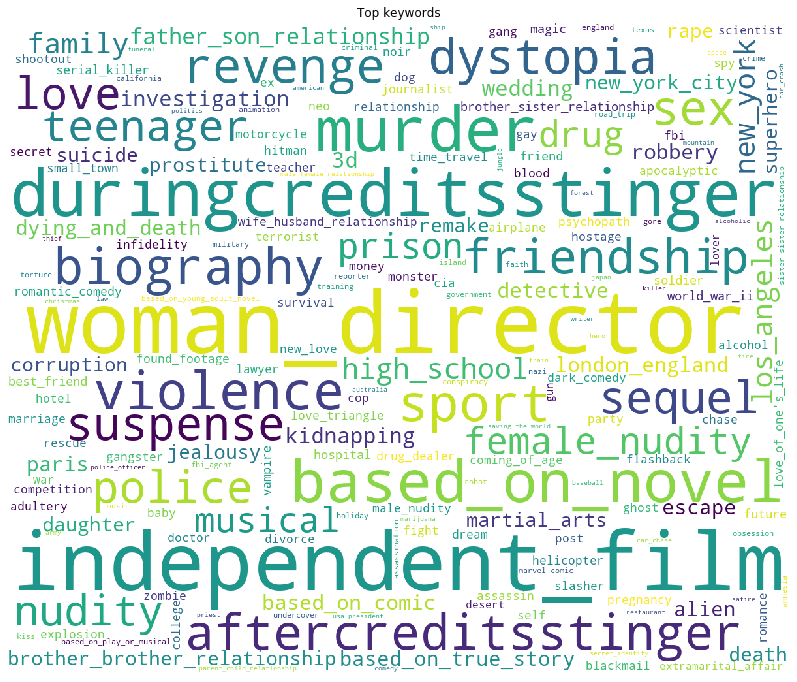

In [60]:
plt.figure(figsize = (16, 12))

text = " ".join(["_".join(i.split(" ")) for j in list_of_keywords for i in j])
wordcloud = WordCloud(max_font_size = None, background_color = "white", collocations = False,\
                      width = 1200, height = 1000).generate(text)

plt.imshow(wordcloud)
plt.title("Top keywords")
plt.axis("off")

##### 키워드 수, 키워드 명을 변수로 추가

In [61]:
train_df["num_keywords"] = train_df["Keywords"].apply(lambda x: len(x) if x != {} else 0)
train_df["all_keywords"] = train_df["Keywords"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

test_df["num_keywords"] = test_df["Keywords"].apply(lambda x: len(x) if x != {} else 0)
test_df["all_keywords"] = test_df["Keywords"].apply(lambda x: " ".join(sorted([i["name"] for i in x])) if x != {} else "")

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,language_zh,language_hi,language_pt,language_ar,language_ko,language_cn,language_ta,language_pl,num_keywords,all_keywords
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,0,0,0,0,0,0,0,0,4,duringcreditsstinger hot tub sequel time travel
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,0,0,0,0,0,0,4,coronation duty falling in love marriage
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,0,0,0,0,0,0,0,0,12,conservatory drummer jazz jazz band montage mu...
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,1,0,0,0,0,0,0,7,bollywood crime india missing husband mystery ...
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,0,0,1,0,0,0,0,


##### 가장 흔한 키워드 30개 추출

In [62]:
top_keywords = [m[0] for m in Counter([i for j in list_of_keywords for i in j]).most_common(30)]

top_keywords

['woman director',
 'independent film',
 'duringcreditsstinger',
 'murder',
 'based on novel',
 'violence',
 'sport',
 'biography',
 'aftercreditsstinger',
 'dystopia',
 'revenge',
 'friendship',
 'sex',
 'suspense',
 'sequel',
 'love',
 'police',
 'teenager',
 'nudity',
 'female nudity',
 'drug',
 'prison',
 'musical',
 'high school',
 'los angeles',
 'new york',
 'family',
 'father son relationship',
 'kidnapping',
 'investigation']

##### 흔한 키워드 30개 각각을 포함하는지 여부를 변수로 추가

In [63]:
for g in top_keywords:
    train_df["keyword_" + g] = train_df["all_keywords"].apply(lambda x: 1 if g in x else 0)
    test_df[ "keyword_" + g] =  test_df["all_keywords"].apply(lambda x: 1 if g in x else 0)

train_df = train_df.drop(["Keywords", "all_keywords"], axis = 1)
test_df  =  test_df.drop(["Keywords", "all_keywords"], axis = 1)

train_df.head()

,id,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,release_date,...,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation
0,1,14000000,NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,2/20/15,...,0,0,0,0,0,0,0,0,0,0
1,2,40000000,NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,8/6/04,...,0,0,0,0,0,0,0,0,0,0
2,3,3300000,http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,10/10/14,...,0,0,0,0,0,1,0,0,0,0
3,4,1200000,http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,3/9/12,...,0,0,0,0,0,0,0,0,0,0
4,5,0,NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,2/5/09,...,0,0,0,0,0,0,0,0,0,0


### (7) cast

In [64]:
train_df["cast"].head()

0    [{'cast_id': 4, 'character': 'Lou', 'credit_id...
1    [{'cast_id': 1, 'character': 'Mia Thermopolis'...
2    [{'cast_id': 5, 'character': 'Andrew Neimann',...
3    [{'cast_id': 1, 'character': 'Vidya Bagchi', '...
4    [{'cast_id': 3, 'character': 'Chun-soo', 'cred...
Name: cast, dtype: object

##### 캐스팅 수 분포

In [66]:
train_df["cast"].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: cast, dtype: int64

##### 각 영화에서 배우들 추출

In [67]:
list_of_cast_names = list(train_df["cast"].apply(lambda x: [i["name"] for i in x] if x != {} else []))

list_of_cast_names

[['Rob Corddry',
  'Craig Robinson',
  'Clark Duke',
  'Adam Scott',
  'Chevy Chase',
  'Gillian Jacobs',
  'Bianca Haase',
  'Collette Wolfe',
  'Kumail Nanjiani',
  'Kellee Stewart',
  'Josh Heald',
  'Gretchen Koerner',
  'Lisa Loeb',
  'Jessica Williams',
  'Bruce Buffer',
  'Mariana Paola Vicente',
  'Christian Slater',
  'Jason Jones',
  'Olivia Jordan',
  'Christine Bently',
  'Stacey Asaro',
  'John Cusack',
  'Adam Herschman',
  'Kisha Sierra'],
 ['Anne Hathaway',
  'Julie Andrews',
  'H√©ctor Elizondo',
  'John Rhys-Davies',
  'Heather Matarazzo',
  'Chris Pine',
  'Callum Blue',
  'Larry Miller',
  'Raven-Symon√©',
  'Kathleen Marshall',
  'Caroline Goodall',
  'Lorraine Nicholson',
  'Shannon Wilcox',
  'Greg Lewis',
  'Abigail Breslin',
  'Paul Vogt',
  'Joseph Leo Bwarie',
  'Hope Alexander-Willis',
  'Rowan Joseph',
  'Jeffrey Scott Jensen'],
 ['Miles Teller',
  'J.K. Simmons',
  'Melissa Benoist',
  'Austin Stowell',
  'Jayson Blair',
  'Kavita Patil',
  'Paul Reiser',


##### 가장 많이 캐스팅된 배우 15명 추출

In [69]:
common_cast = Counter([i for j in list_of_cast_names for i in j]).most_common(15)

common_cast

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23),
 ('Willem Dafoe', 23),
 ('Bill Murray', 22),
 ('Owen Wilson', 22),
 ('Nicolas Cage', 22),
 ('Sylvester Stallone', 21)]

##### 각 영화에서 배우 이름과 사진 경로 추출

In [70]:
list_of_cast_names_url = list(train_df["cast"].apply(lambda x: [(i["name"], i["profile_path"]) for i in x] if x != {} else []))

list_of_cast_names_url

[[('Rob Corddry', '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'),
  ('Craig Robinson', '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'),
  ('Clark Duke', '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'),
  ('Adam Scott', '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'),
  ('Chevy Chase', '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'),
  ('Gillian Jacobs', '/rBnhe5vhNPnhRUdtYahBWx90fJM.jpg'),
  ('Bianca Haase', '/4x3nbtD8q8phAJPmoGWXPvz0iM.jpg'),
  ('Collette Wolfe', '/aSD4h5379b2eEw3bLou9ByLimmq.jpg'),
  ('Kumail Nanjiani', '/x4nAztHY72SVciRfxEsbhIVTsIu.jpg'),
  ('Kellee Stewart', '/w3xmsEPmJc1Cf0dQ4aIn8YmlHbk.jpg'),
  ('Josh Heald', '/pwXJIenrDMrG7t3zNfLvr8w1RGU.jpg'),
  ('Gretchen Koerner', '/muULPexCTJGyJba4yKzxronpD50.jpg'),
  ('Lisa Loeb', '/bGqg58ca0bZR38z9HliUMmeNGE.jpg'),
  ('Jessica Williams', '/A4syKjkcYB92wLEhH0c0hC3BCpz.jpg'),
  ('Bruce Buffer', None),
  ('Mariana Paola Vicente', '/ckPllza8624UHWGHCbLShkLxCD1.jpg'),
  ('Christian Slater', '/3ElLWjnvchMS6Q4cIQOK8QNAoMG.jpg'),
  ('Jason Jones', '/aIoCw6vo8AGMdsQRAI5g2t0yJT3.jpg'),
  ('

##### 가장 많이 캐스팅 된 배우명, 사진 경로 추출

In [72]:
common_cast_names_url = Counter([i for j in list_of_cast_names_url for i in j]).most_common(15)

common_cast_names_url

[(('Samuel L. Jackson', '/AvCReLikjzYEf9XjTQxbv3JWgKT.jpg'), 30),
 (('Robert De Niro', '/lvTSwUcvJRLAJ2FB5qFaukel516.jpg'), 30),
 (('Morgan Freeman', '/oGJQhOpT8S1M56tvSsbEBePV5O1.jpg'), 27),
 (('J.K. Simmons', '/jPoNW5fugs5h8AbcE7H5OBm04Tm.jpg'), 25),
 (('Bruce Willis', '/2B7RySy2WMVJKKEFN2XA3IFb8w0.jpg'), 25),
 (('Liam Neeson', '/9mdAohLsDu36WaXV2N3SQ388bvz.jpg'), 25),
 (('Susan Sarandon', '/giqZPokZi2nKLtYw8hrMVf8Vita.jpg'), 25),
 (('Bruce McGill', '/r9UNvqwTYB9C3AcGyBpcjzkCnVD.jpg'), 24),
 (('John Turturro', '/70V4hwvWN0J3aX2LzQg7eKCeq29.jpg'), 24),
 (('Forest Whitaker', '/4pMQkelS5lK661m9Kz3oIxLYiyS.jpg'), 23),
 (('Willem Dafoe', '/xM5lhOR5tWWdIlFpBDeZJx9opIP.jpg'), 23),
 (('Bill Murray', '/7BOoOAIA1CnSzFSVSJP7saniQaB.jpg'), 22),
 (('Owen Wilson', '/j7oYgvfDiO34VcFdSB7GhM2CSle.jpg'), 22),
 (('Nicolas Cage', '/ti2h1OS1n1VwoJHWFaJD8dMZuEE.jpg'), 22),
 (('Sylvester Stallone', '/gnmwOa46C2TP35N7ARSzboTdx2u.jpg'), 21)]

##### 사진 받아서 그리기

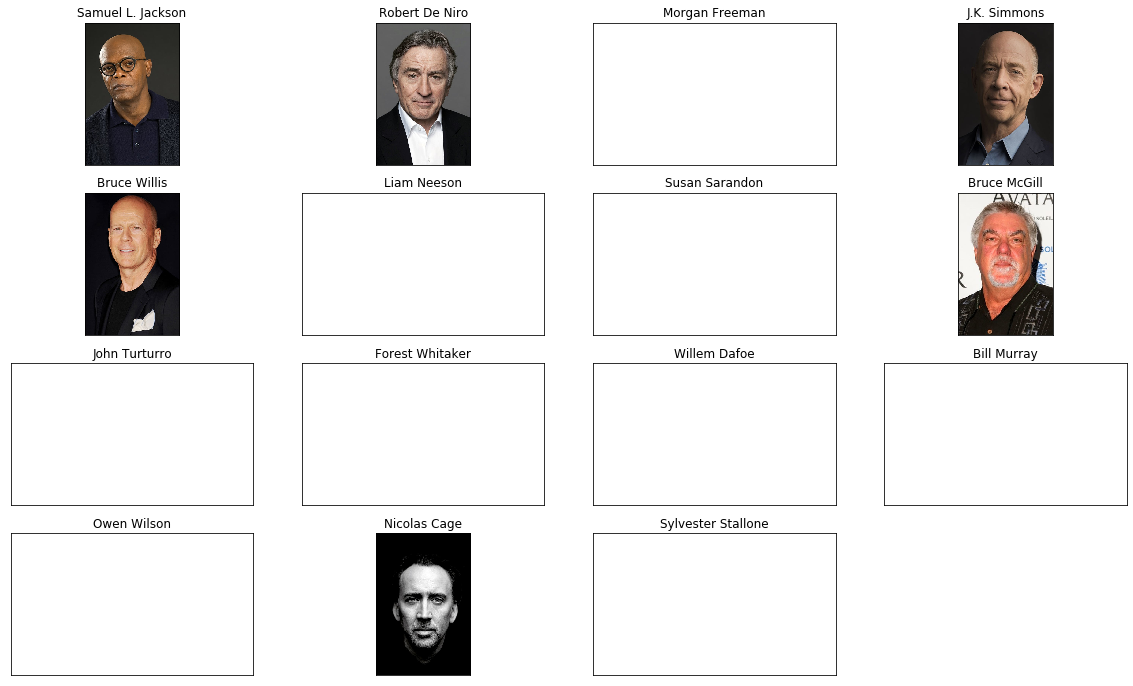

In [81]:
from PIL import Image
from urllib.request import urlopen

fig = plt.figure(figsize = (20, 12))

for i, p in enumerate([j[0] for j in common_cast_names_url]):
    ax = fig.add_subplot(4, 4, i + 1, xticks = [], yticks = [])
    try:
        im = Image.open(urlopen(f"https://image.tmdb.org/t/p/w500{p[1]}"))
        plt.imshow(im)
    except:
        pass
    ax.set_title(f"{p[0]}")

***
# 데이터 분석

***
# 모델링